In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

See also: https://www.kaggle.com/code/sdysch/tps-july-2022/edit/run/99936538

## Idea
* Use autoencoder to compress dimensions to a latent space
* Cluster the reduced dimensionality space

In [2]:
plt.style.use('seaborn')

In [3]:
data = pd.read_csv('../input/tabular-playground-series-jul-2022/data.csv', index_col='id')

# Setup autoencoder model

In [4]:
import tensorflow
from tensorflow.keras.layers import Input, Normalization, Dense
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam

# preprocessing
norm = Normalization()
norm.adapt(data)

input = Input(shape=(data.shape[1],))

encoder = norm(input)

encoder = Dense(100, activation='relu')(encoder)
encoder = Dense(50, activation='relu')(encoder)
encoder = Dense(10, activation='relu')(encoder)

decoder = Dense(10, activation='relu')(encoder)
decoder = Dense(50, activation='relu')(decoder)
decoder = Dense(100, activation='relu')(decoder)

decoder = Dense(data.shape[1], activation='linear')(decoder)

autoencoder = Model(input, decoder)
encoder = Model(input, encoder)

learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
autoencoder.compile(optimizer=optimizer, loss='mean_squared_error')

autoencoder.summary()
encoder.summary()

2022-07-10 13:39:37.383981: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-10 13:39:37.483509: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-10 13:39:37.484468: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-10 13:39:37.486514: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 29)]              0         
_________________________________________________________________
normalization (Normalization (None, 29)                59        
_________________________________________________________________
dense (Dense)                (None, 100)               3000      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 50)                550   

In [5]:
batch_size = 32
epochs = 100
history = autoencoder.fit(data, data, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/100
3063/3063 [==============================] - 8s 2ms/step - loss: 1.5872
Epoch 2/100
3063/3063 [==============================] - 7s 2ms/step - loss: 0.9623
Epoch 3/100
3063/3063 [==============================] - 7s 2ms/step - loss: 0.9487
Epoch 4/100
3063/3063 [==============================] - 7s 2ms/step - loss: 0.9393
Epoch 5/100
3063/3063 [==============================] - 7s 2ms/step - loss: 0.9257
Epoch 6/100
3063/3063 [==============================] - 7s 2ms/step - loss: 0.9144
Epoch 7/100
3063/3063 [==============================] - 7s 2ms/step - loss: 0.9037
Epoch 8/100
3063/3063 [==============================] - 7s 2ms/step - loss: 0.8953
Epoch 9/100
3063/3063 [==============================] - 8s 3ms/step - loss: 0.8900
Epoch 10/100
3063/3063 [==============================] - 7s 2ms/step - loss: 0.8849
Epoch 11/100
3063/3063 [==============================] - 7s 2ms/step - loss: 0.8808
Epoch 12/100
3063/3063 [==============================] - 7s 2ms/step - lo

In [6]:
data_red = encoder.predict(data)

# Gaussian mixture model

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_red = scaler.fit_transform(data_red)

In [8]:
data_red = pd.DataFrame(data_red, columns=[str(v) for v in range(10)])
data_red

,0,1,2,3,4,5,6,7,8,9
0,0.402716,1.601670,-0.311893,-0.807130,-0.016490,0.0,-0.687091,0.0,-0.213788,-0.364105
1,0.410527,-1.542401,1.309818,2.488675,0.922449,0.0,1.552807,0.0,1.826661,1.699523
2,0.884818,-0.120255,0.228187,0.418861,0.482261,0.0,1.202825,0.0,1.129231,1.075473
3,1.451596,-1.843336,1.556356,1.236349,1.638997,0.0,1.478867,0.0,1.566796,1.443907
4,-0.811367,-0.651137,1.550018,1.360180,0.201301,0.0,1.342312,0.0,1.184855,1.154689
...,...,...,...,...,...,...,...,...,...,...
97995,-0.140342,-0.406950,0.165195,-0.049220,-0.062264,0.0,0.204172,0.0,0.269323,0.193702
97996,-0.901221,-0.122591,-0.020247,0.914568,-0.313876,0.0,0.659101,0.0,0.595871,0.538675
97997,-0.613327,-0.332401,0.368620,-0.744353,0.194357,0.0,0.090708,0.0,0.010425,0.100319
97998,-1.018588,0.156814,-0.316581,0.179764,0.688248,0.0,0.049153,0.0,0.070896,0.056462


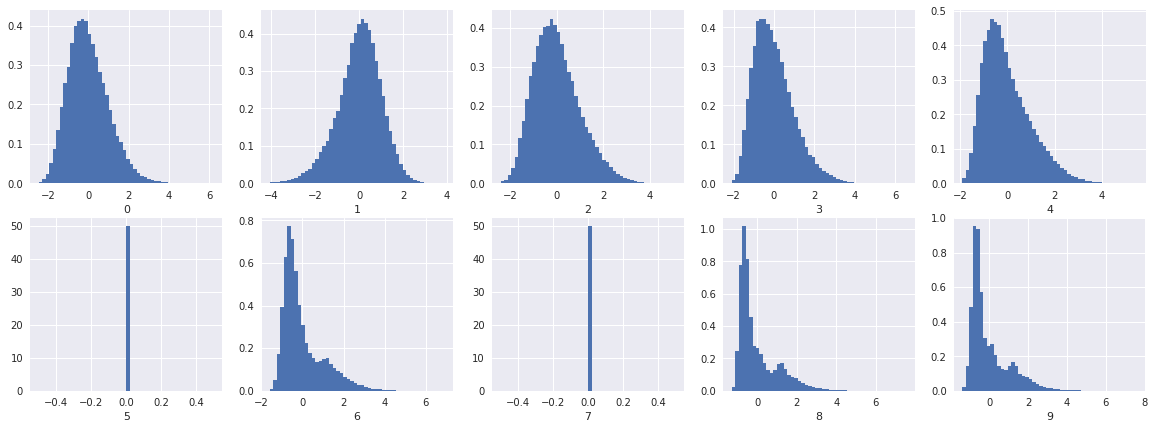

In [9]:
nrows, ncols = 2, 5
fig, ax = plt.subplots(nrows, ncols, figsize=(20, 7))
ax = ax.ravel()
for i, var in enumerate(data_red.columns):
    bins = 50
    ax[i].hist(data_red[var], density=True, bins=bins)
    ax[i].set_xlabel(var)
ax = ax.reshape(nrows, ncols)
fig.show()

In [10]:
data_red = data_red.drop(['4', '9'], axis='columns')
data_red

,0,1,2,3,5,6,7,8
0,0.402716,1.601670,-0.311893,-0.807130,0.0,-0.687091,0.0,-0.213788
1,0.410527,-1.542401,1.309818,2.488675,0.0,1.552807,0.0,1.826661
2,0.884818,-0.120255,0.228187,0.418861,0.0,1.202825,0.0,1.129231
3,1.451596,-1.843336,1.556356,1.236349,0.0,1.478867,0.0,1.566796
4,-0.811367,-0.651137,1.550018,1.360180,0.0,1.342312,0.0,1.184855
...,...,...,...,...,...,...,...,...
97995,-0.140342,-0.406950,0.165195,-0.049220,0.0,0.204172,0.0,0.269323
97996,-0.901221,-0.122591,-0.020247,0.914568,0.0,0.659101,0.0,0.595871
97997,-0.613327,-0.332401,0.368620,-0.744353,0.0,0.090708,0.0,0.010425
97998,-1.018588,0.156814,-0.316581,0.179764,0.0,0.049153,0.0,0.070896


## Deciding optimal number of clusters

In [11]:
%%time
SEED = 42
CLUSTERS = 40
from sklearn.mixture import GaussianMixture
clusters, bics = list(), list()
for cluster in range(2, CLUSTERS):
    print(f'Components: {cluster}')
    model = GaussianMixture(n_components=cluster, random_state=SEED)
    
    model.fit(data_red)
    bics.append(model.bic(data_red))
    
    clusters.append(cluster)

Components: 2
Components: 3
Components: 4
Components: 5
Components: 6
Components: 7
Components: 8
Components: 9
Components: 10
Components: 11
Components: 12
Components: 13
Components: 14
Components: 15
Components: 16
Components: 17
Components: 18
Components: 19
Components: 20
Components: 21
Components: 22
Components: 23
Components: 24
Components: 25
Components: 26
Components: 27
Components: 28
Components: 29
Components: 30
Components: 31
Components: 32
Components: 33
Components: 34
Components: 35
Components: 36
Components: 37
Components: 38
Components: 39
CPU times: user 17min 19s, sys: 6min 39s, total: 23min 58s
Wall time: 13min


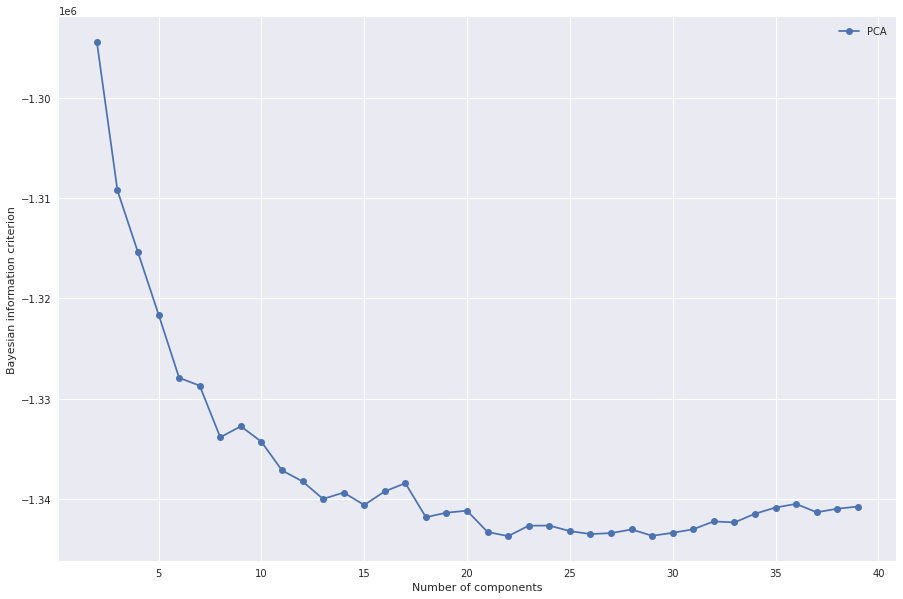

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.plot(clusters, bics, marker='o', label='PCA')
ax.set_xlabel('Number of components')
ax.set_ylabel('Bayesian information criterion')
ax.legend(loc='best')
fig.show()

In [13]:
model = GaussianMixture(n_components=11)
model.fit(data_red)
pred = model.predict(data_red)

## Visualise clusters in different 2D projections

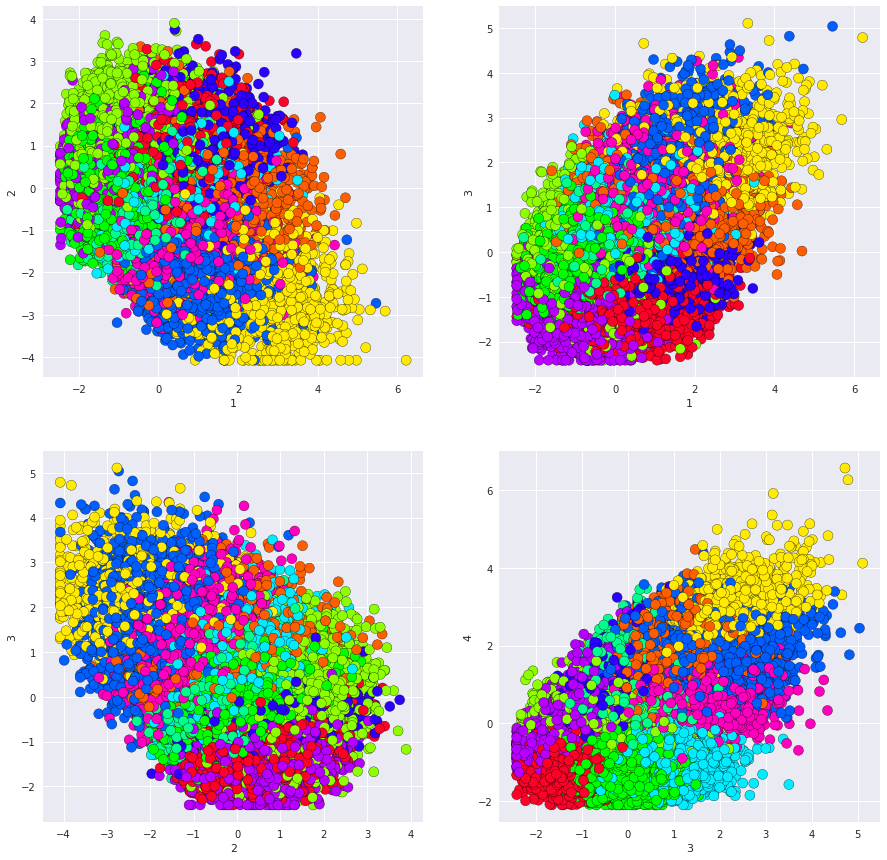

In [14]:
# plot features, colour by class
s = 100
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
ax[0, 0].scatter(data_red['0'], data_red['1'], c=pred, cmap='gist_rainbow', edgecolor='k', s=s)
ax[0, 0].set_xlabel('1')
ax[0, 0].set_ylabel('2')

ax[0, 1].scatter(data_red['0'], data_red['2'], c=pred, cmap='gist_rainbow', edgecolor='k', s=s)
ax[0, 1].set_xlabel('1')
ax[0, 1].set_ylabel('3')

ax[1, 0].scatter(data_red['1'], data_red['2'], c=pred, cmap='gist_rainbow', edgecolor='k', s=s)
ax[1, 0].set_xlabel('2')
ax[1, 0].set_ylabel('3')

ax[1, 1].scatter(data_red['2'], data_red['3'], c=pred, cmap='gist_rainbow', edgecolor='k', s=s)
ax[1, 1].set_xlabel('3')
ax[1, 1].set_ylabel('4')

fig.show()

# Final submission

In [15]:
submission = pd.read_csv('../input/tabular-playground-series-jul-2022/sample_submission.csv')
submission.head()
submission["Predicted"] = pred
submission.to_csv('submission.csv', index=False)
submission.head()

,Id,Predicted
0,0,0
1,1,1
2,2,10
3,3,7
4,4,10


In [16]:
submission['Predicted'].value_counts()

4     21132
3     11522
9     10614
0     10400
10     8992
5      8524
6      8095
7      6196
8      5467
1      5106
2      1952
Name: Predicted, dtype: int64